>Создать функцию, генерирующую гармонический сигнал по правилу: ___y = A*cos(2Pi*f*t + fi0)___, где A - амплитуда, f - частота, t - время, fi0 - начальная фаза. 

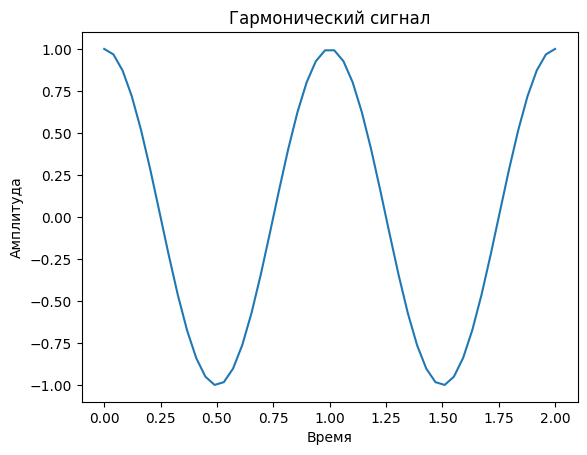

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
def y(A, f, t, phi0):
    return A * math.cos(2*math.pi*f*t + phi0)

def generate_periodic_signal():    
    # Параметры сигнала
    A = 1
    f = 1
    phi0 = 0
    t = np.linspace(0, 2, 50)
    values = []
    # Генерация сигнала
    for dt in t:
        values.append(y(A, f, dt, phi0))
    return t, values
# Визуализация сигнала
t, values = generate_periodic_signal()
plt.plot(t, values)
plt.title('Гармонический сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

>Создать функцию, генерирующую периодический сигнал, изменяя в правиле значение частоту в диапазоне от 0 до Pi с шагом 0.1.
>
>> Исследуйте  изменение графика относительно начального.

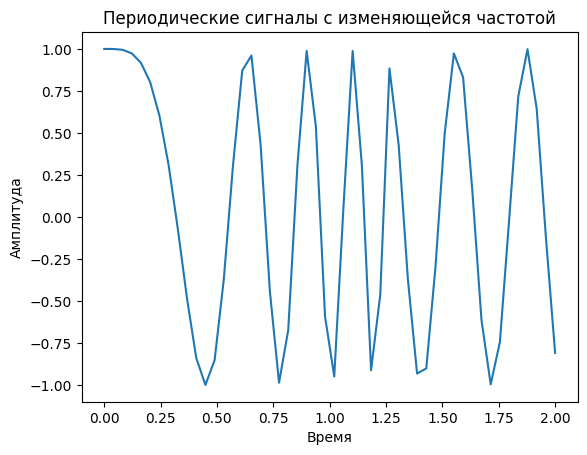

In [2]:
def generate_periodic_signal_varying_frequency(): 
    # Параметры сигнала
    A = 1
    phi0 = 0
    f = 0
    t = np.linspace(0, 2, 50)
    values = []
    # Генерация сигнала
    for dt in t:
        values.append(y(A, f, dt, phi0))
        if f <= math.pi: f += 0.1
    return t, values
              
t, values = generate_periodic_signal_varying_frequency()
plt.plot(t, values)
plt.title('Периодические сигналы с изменяющейся частотой')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()


### ___Как можно заметить по графику частота колебаний сигнала увеличилась, а период уменьшился___

>Провести аналогичные исследования, изменяя значения амплитуды в диапазоне от 0 до 2. Шаг 0.1

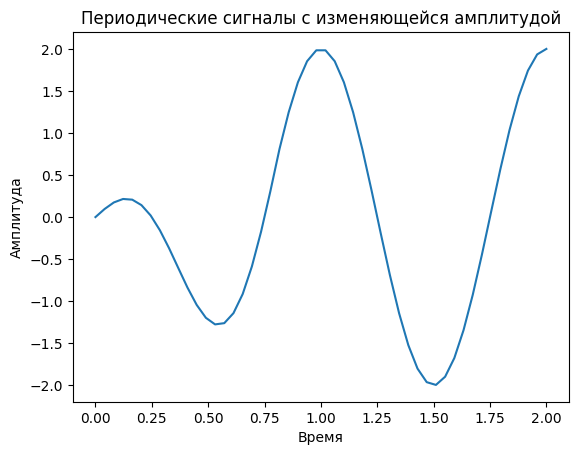

In [3]:
def generate_periodic_signal_varying_amplitude():
    A = 0
    phi0 = 0
    f = 1
    t = np.linspace(0, 2, 50)
    values = []
    # Генерация сигнала
    for dt in t:
        values.append(y(A, f, dt, phi0))
        if A <= 2: A += 0.1
    return t, values


t, values = generate_periodic_signal_varying_amplitude()
plt.plot(t, values)
plt.title('Периодические сигналы с изменяющейся амплитудой')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

### ___Как можно заметить по графику, амплитуда колебаний сигнала постепенно увеличивается___

>Полученные три функции сложить и вывести результат.

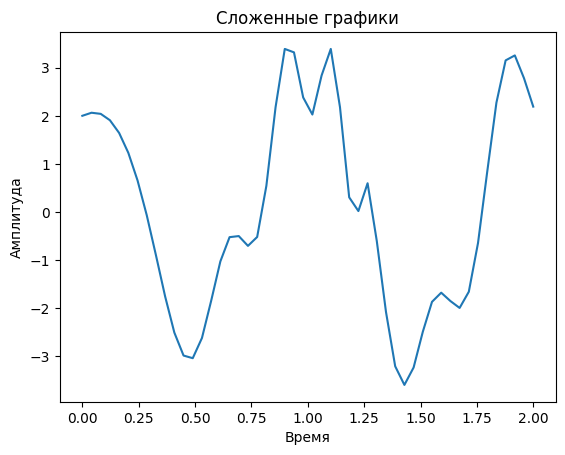

In [4]:
def generate_combined_signal():
    t1, v1 = generate_periodic_signal()
    t2, v2 = generate_periodic_signal_varying_frequency()
    t3, v3 = generate_periodic_signal_varying_amplitude()
    result = np.array(v1) + np.array(v2) + np.array(v3)
    return t1, result
t, values = generate_combined_signal()
plt.plot(t, values)
plt.title('Сложенные графики')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.show()

>Пусть плоскость первого сигнала лежит вдоль оси Z. Плоскость второго сигнала повернуть на <свой порядковый номер в группе> градусов относительно первой. Плоскость третьего - на <свой порядковый номер в группе> градусов относительно второй.  Направление поворота выберите сами (относительно оси x, y или z).
>
>>Сложить сигналы. Вывести  результат. 

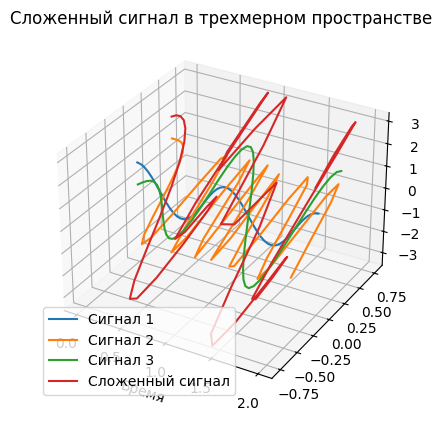

In [5]:
def rotate_signal(signal, angle, axis):
    rotation_matrix = np.eye(3)
    if axis == 'x':
        rotation_matrix = np.array([
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)]
        ])
    elif axis == 'y':
        rotation_matrix = np.array([
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)]
        ])
    elif axis == 'z':
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1]
        ])
    rotated_signal = np.dot(rotation_matrix, signal)
    return rotated_signal
def generate_combined_signal_rotated():
    t1, v1 = generate_periodic_signal()
    t2, v2 = generate_periodic_signal_varying_frequency()
    t3, v3 = generate_periodic_signal_varying_amplitude()
    
    # Поворот сигналов
    angle1 = np.radians(30)  
    angle2 = np.radians(10)  

    v1_rotated = rotate_signal(np.vstack((t1, v1, np.zeros_like(v1) )), np.radians(0),'x')
    v2_rotated = rotate_signal(np.vstack((t2, v2, np.zeros_like(v2) )), angle1,       'x')
    v3_rotated = rotate_signal(np.vstack((t3, v3, np.zeros_like(v3) )), angle2,       'x')
    
    combined = np.array(v1_rotated) + np.array(v2_rotated) + np.array(v3_rotated)
    return t1, v1, v2_rotated, v3_rotated, combined

t, v1,  v2_rotated, v3_rotated, combined_signal = generate_combined_signal_rotated()

# Визуализация результата
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, v1, zs=0, zdir='y',label='Сигнал 1')
ax.plot(v2_rotated[0], v2_rotated[1], v2_rotated[2], zdir='y', label='Сигнал 2')
ax.plot(v3_rotated[0], v3_rotated[1], v3_rotated[2], zdir='y', label='Сигнал 3')
ax.plot(t,combined_signal[1],combined_signal[2],     zdir='y', label='Сложенный сигнал')
ax.set_title('Сложенный сигнал в трехмерном пространстве')
ax.set_xlabel('Время')
ax.legend()
plt.show()


>Вычислить амплитуду, частоту и фазу результирующего сигнала с использованием быстрого преобразования Фурье (FFT). 
>
>>Построить амплитудный спектр полученного сигнала.
>
>>Проанализировать результат.

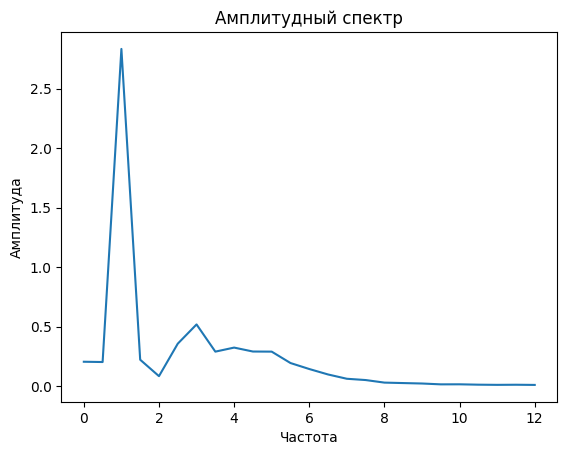

In [6]:
t, values = generate_combined_signal()
N = len(values)
T = 2/50
yf = fft(values)
xf = fftfreq(N, T)[:N//2]
# Визуализация амплитудного спектра
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

### ___Как можно заметить по амплитудному спектру, наибольшая амплитуда сложенного сигнала соответствует частоте равной ~ 1.5___